In [1]:
pwd

'/Users/surajpawar/Desktop/Analyzing selling price of used cars using python'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
df= pd.read_csv("/Users/surajpawar/Desktop/Analyzing selling price of used cars using python/vehicle_data.csv")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [5]:
headers = ["symboling", "normalized-losses", "make", 
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size", 
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [8]:
data = df
data.isna().any()
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [9]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [10]:
data['city-mpg'] = 235/df['city-mpg']
data.rename(columns = {'city-mpg':'city-L / 100km'}, inplace = True)
print(data.columns)
data.dtypes

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L / 100km',
       'highway-mpg', 'price'],
      dtype='object')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L / 100km       float64
highway-mpg            int64
price                 object
dtype: object

In [11]:
data.price.unique()

data = data[data.price != '?']

data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L / 100km       float64
highway-mpg            int64
price                 object
dtype: object

In [12]:
data.price.unique()

array(['16500', '13950', '17450', '15250', '17710', '18920', '23875',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',
     

In [13]:
data = data[data.price != '?']

In [14]:
data['price'] = data['price'].astype(int)
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L / 100km       float64
highway-mpg            int64
price                  int64
dtype: object

In [16]:
print(data.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   
3        sedan          4wd           front        99.4  ...          136   
4        sedan          fwd           front        99.8  ...          136   

   fuel-system  bore  stroke compression-ratio hor

0         low
1         low
2         low
3         low
4         low
        ...  
199       low
200    medium
201    medium
202    medium
203    medium
Name: price-binned, Length: 200, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


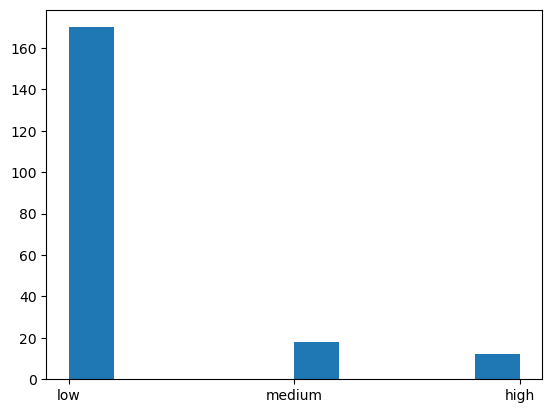

In [20]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['low', 'medium', 'high']
data['price-binned'] = pd.cut(data['price'], bins, labels = group_names, include_lowest = True)
print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()

In [21]:
pd.get_dummies(data['fuel-type']).head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L / 100km,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


<Axes: xlabel='drive-wheels', ylabel='price'>

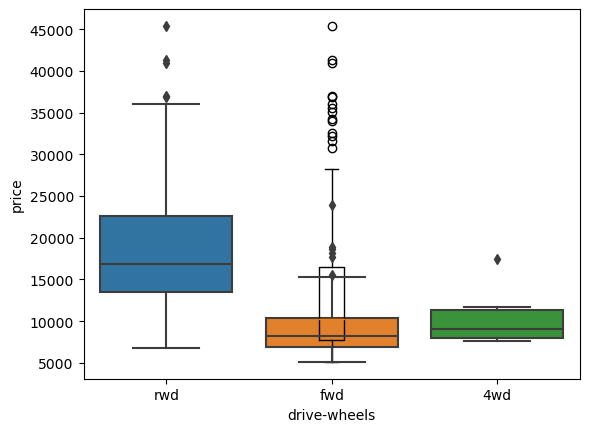

In [23]:
plt.boxplot(data['price'])

sns.boxplot(x= 'drive-wheels',y = 'price', data = data)

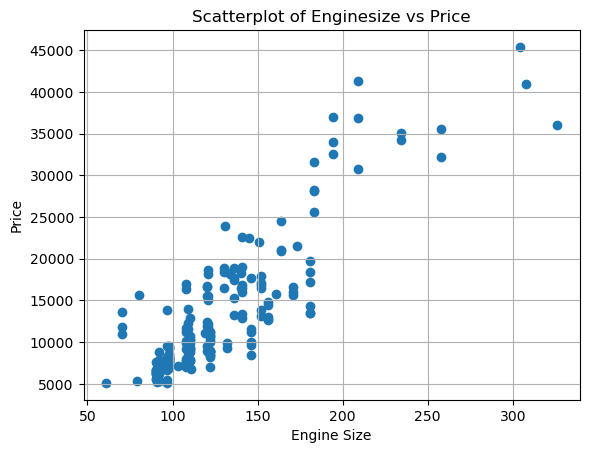

In [24]:
plt.scatter(data['engine-size'], data['price'])
plt.title("Scatterplot of Enginesize vs Price")
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [25]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L / 100km,highway-mpg,price,price-binned
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500,low
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500,low
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,9.791667,30,13950,low
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,13.055556,22,17450,low
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,8.5,110,5500,12.368421,25,15250,low


In [26]:
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels','body-style'], as_index = False).mean()
data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [27]:
data_pivot = data_grp.pivot(index = 'drive-wheels', columns = 'body-style')
data_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

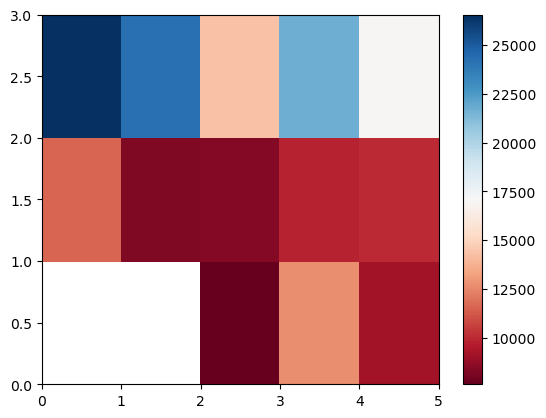

In [28]:
plt.pcolor(data_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

In [29]:
data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(grouped_annova.get_group('honda')['price'], grouped_annova.get_group('subaru')['price'])
print(annova_results_l)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53431.75653380849)

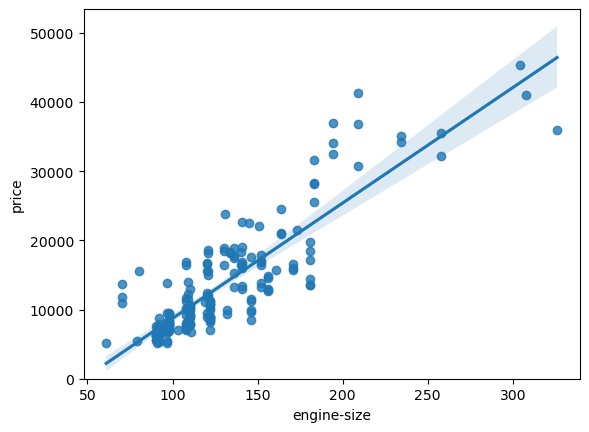

In [30]:
sns.regplot(x='engine-size', y='price', data=data)
plt.ylim(0,)